<B>To build the model, we perform the following:</B><br>
<li>Importing the dataset<br>
<li>Cleaning the text<br>
<li>Creating a ‘Bag of Words’<br>
<li>Training and classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

Our dataset Restaurant_reviews.tsv is a tsv file.<br><br>TSV is a file extension for a tab-delimited file used with spreadsheet software. TSV stands for Tab Separated Values. TSV files are used for raw data and can be imported into and exported from spreadsheet software.<br><br>The parameter delimiter is used to indicate that tab acts as a separator between reviews and their class. Quoting is used to remove the quotes (“) in the review, which may hinder further processing.

In [2]:
dataset = pd.read_csv('datasets/Restaurant_reviews.tsv' , delimiter= '\t', quoting = 3)
# quoting = 3 is for ignoring "" for our safety.
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
len(dataset.Review)

1000

In [4]:
dataset.groupby('Liked').describe()

Review                                
       count unique                 top freq
Liked                                       
0        500    497    I won't be back.    2
1        500    499  I love this place.    2

We can see in the output there are equal review counts for likes and unlikes. Where the number of unique reviews for unlike and like is 497 and 499 respectively. 

<B>Cleaning the text</B><br>
We need to pre-process our data by removing any vague information. For example, we don’t need words such as ‘the,’ ‘and,’ ‘a’ in our text since they do not help in determining whether the review is good or bad. These words are called stopwords. Next, we apply stemming, which is converting all the forms of expression to its root form. For example, ‘loved,’ ‘loving’ to its lemma(root word) ‘love.’<br><br>
<B>Stemming </B>Stemming means taking the root of the word eg. loved, loving, will love. This will reduce different versions of the same word and will hence reduce the sparsity of matrix

In [5]:
# Cleaning the text (Basically We are removing non-determiners and stemming)
# stopwords is a list of unwanted words like the,and,of,etc...
# corpus is a collection of text.
import re                          # Regular Expression
import nltk                        # natural language tool kit - Used for processing of natutal languages i.e., human languages
#nltk.download('stopwords')         # Download stopwords from nltk
#stopwords_location = 'C:\\Users\\Ankit Sharma\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'
from nltk.corpus import stopwords
#We'll be performing stemming now
from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()               # Object of PorterStemmer class
#words = stopwords.words('english')
corpus = []                        # Initialize an empty list for all reviews

# Iterating through all the reviews
for i in range(0,1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    #review = re.sub('[^a-zA-Z]', ' ', dataset.Review[i])
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # converting review to lowercase
    review = review.lower()
    # Converting review to list(of Strings)
    review  = review.split()
    ps = PorterStemmer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('no')
    words.remove('but')
    words.remove('is')
    # Loop through all words and keep those which are not in stopwords list.
    # set is much faster than a list and is considered when the review is very large eg. an article,a book
    review = [ps.stem(word) for word in review if not word in set(words)]
    # Joining back the review list to a string with each word seperated by a space.
    review = ' '.join(review)
    corpus.append(review)

In [6]:
stopwords_ = list(words)
print(stopwords_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'c

In [7]:
corpus[0:5]

['wow love place',
 'crust is not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [8]:
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\Ankit Sharma\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


<b>Creating a ‘Bag of Words’ </b>Bag of Words Model is a sparse matrix where each row is the review and each column is a unique word from the reviews.<br><br>
we apply vectorization to convert the reviews into a numerical format. We create a sparse matrix containing individual reviews as rows and each word of the reviews as columns. We call this the Bag of Words. Our text is now ready for training.<br><br>
<B>Tokenization: </B>Process of taking all unique words of reviews and creating columns for each word.<br><br>
Since this a problem of classification we have dependent and independent variables and each unique word/column is like an independent variable and the review(good/bad) depends on these words.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
#X = cv.fit_transform(corpus)                          
X = cv.fit_transform(corpus).toarray()                 # toarray() is used to convert into matrix
y = dataset.iloc[:,1].values

In [10]:
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

#### Training and Classification

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)

In [13]:
# We will be using SVM
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
clf = SVC(kernel='linear', random_state=0)
#clf = LinearSVC()
clf.fit(X_train, y_train)

#Predicting the test result
y_pred = clf.predict(X_test)
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})

#results = pd.DataFrame(results)
results[0:20]

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


In [15]:
results.Predicted.value_counts()

1    52
0    48
Name: Predicted, dtype: int64

In [16]:
results.Actual.value_counts()

0    51
1    49
Name: Actual, dtype: int64

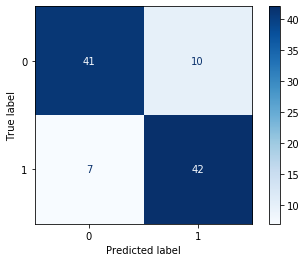

In [17]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[41 10]
 [ 7 42]]
0.83
